# Grays Harbor Tides with Sine Forcing

First run the GeoClaw code and then use this notebook to examine the gauge results.

In [1]:
%matplotlib inline

In [2]:
from pylab import *

In [3]:
import clawpack.pyclaw.gauges as gauges

At gauge 0, etamin2 = -1.002, etamax2 = 1.002 at tshift = 315.1 s
At gauge 1102, etamin2 = -1.063, etamax2 = 1.110 at tshift = 2743.2 s
At gauge 1187, etamin2 = -1.201, etamax2 = 1.297 at tshift = 3819.7 s
Created GaugeComparison.png


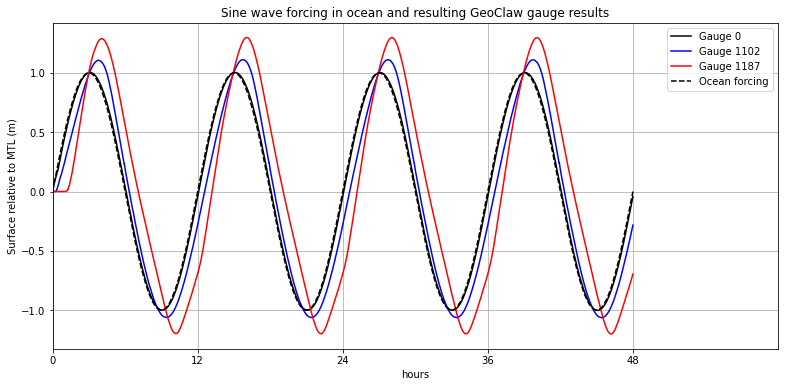

In [5]:
figure(400, figsize=(13,6))
clf()
colors = ['k','b','r']

outdir = '_output'

for k,gaugeno in enumerate([0,1102,1187]):
    gauge = gauges.GaugeSolution(gaugeno, outdir)
    t = gauge.t / 3600.   # convert to hours
    q = gauge.q
    eta = q[3,:]
    plot(t, eta, colors[k], label='Gauge %s' % gaugeno)

    # determine amplification and time shift:
    m2 = int(floor(0.75*len(eta)))
    eta2 = eta[m2:]  # last part of eta signal
    etamax2 = eta2.max()
    etamin2 = eta2.min()
    t2 = t[m2:]
    jtmax = argmax(eta2) 
    tshift = (t2[jtmax] - 39.)*3600.
    
    print('At gauge %i, etamin2 = %.3f, etamax2 = %.3f at tshift = %.1f s' \
            % (gaugeno,etamin2,etamax2,tshift))

# forcing:
tperiod = 12
eta = 1.*sin(2*pi*t/tperiod)
plot(t, eta, 'k--', label='Ocean forcing')

legend(loc='upper right')
xlabel('hours')
ylabel('Surface relative to MTL (m)')
grid(True)
title('Sine wave forcing in ocean and resulting GeoClaw gauge results');

xticks(arange(0,t[-1]+0.1,12))
xlim(0,60)

if 1:
    fname = 'GaugeComparison.png'
    savefig(fname, bbox_inches='tight')
    print('Created %s' % fname)

## Notes:

- The ocean forcing is applied only offshore, to force the ocean surface level to be $\eta_o(t) = \sin(2\pi t / T)$, a pure sine wave with amplitude 1 and period $T = 12\times 3600 = $ 12 hours, as shown by the dashed line in the figure.  In GeoClaw we add a source term to the mass equation so that it becomes
$$
h_t + (hu)_x + (hv)_y = \eta_o'(t)
$$
everywhere in the ocean sufficiently far offshore. Starting with the ocean at rest, and in the absence of any propagating waves this gives $h(x,y,t) = \eta_o(t)$ in this region, as desired.

- Gauge 0 is offshore and shows that GeoClaw does produce the desired sine wave with this forcing.

- Gauges 1102 and 1187 are at the locations of the NOAA tide gauges in Westport and Aberdeen, respectively.  The tide at Westport lags the ocean tide by about 2743 seconds and is amplified relative to the specified ocean tide.  The tide at Aberdeen lags by about 3820 seconds and is further amplified.

- The time lag between high tide at Westport and Aberdeen is about $3820-2743 = 1077$ seconds (18 minutes), which agrees well with observations (need to confirm!).

- At Westport the amplifcation factor is approximate 1.1 (it is greater for the high tide and less for the low tide).

- Given an observed tide at Westport that we want to match, we can shift it by about 2743 seconds and diminish it by a factor 1.1 in order to obtain the $\eta_o(t)$ to use for forcing the ocean.  This is illustrated in the example `geoclaw_tides/grays_kingtide2015`.
